### Transformada Discreta de Fourier
***

```
Implementação da DFT Matricial
Aluno: Alysson Machado de Oliveira Barbosa
```

In [1]:
# importação dos pacotes utilitários
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time

# desabilita todos os warnings
warnings.filterwarnings("ignore")

Lembrando que se $x(n)$ é  um sinal no tempo de discreto e aperiódico, sua Transformada de Fourier é dada por
$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty}x[n]e^{-j\omega n}
$$
e a  inversa 
$$
x(n) = \frac{1}{2\pi}\int_{2\pi}X(e^{j\omega})e^{j\omega n}d\omega
$$
$X(e^{j\omega})$ é uma função contínua de $\omega$.

**Exemplo:** 
***
Seja o sinal
$$
x(n) = \left\{ 
\begin{array}{c c}
1, & 0 \leq n < L \\ 0, & c.c.
\end{array}
\right.
$$
que é limitado no tempo com apenas $L$ valores constantes e não nulos. Calculando a Transformada de Fourier para $L=8$ obtemos
$$
X(e^{j\omega}) = \frac{e^{-j8\omega} - 1}{e^{-j\omega} - 1}
$$
cujo módulo está representado na Figura abaixo:

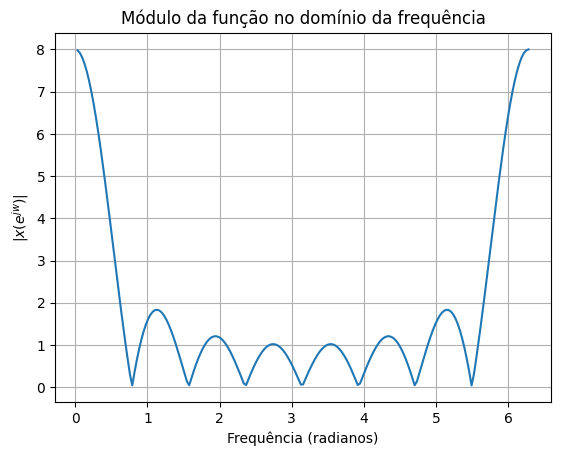

In [2]:
def x(w, L):
    '''
    Representação do sinal x[n] no domínio da frequência

    Inputs:
        w (int) -> frequência em radianos.
        L (int) -> valor máximo de n cujo x[n] = 1, considerando que n > 0.
    '''

    #
    numerator = np.exp(-1j * L * w) - 1
    denominator = np.exp(-1j * w) - 1
    return numerator / denominator

# definindo os valores no domínio da frequência (radianos)
w = np.linspace(0, 2 * np.pi, 200)

# configurações para a plotagem do gráfico
plt.plot(w, np.abs(x(w, L = 8)))
plt.xlabel('Frequência (radianos)')
plt.ylabel('$|x(e^{jw})|$')
plt.title('Módulo da função no domínio da frequência')
plt.grid(True)
plt.show()

O módulo representado na figura acima é uma função contínua de $\omega$, e para realizar a análise espectral usando um processador digital, devemos amostrá-la, o que nos leva a questão de quantas amostras devem ser obtidas.

Por exemplo, se escolhermos $N = 8$, vamos amostras tomar nas frequências $\omega_k = 2\pi k/N$ e obteremos os valores calculados abaixo.

Podemos escrever
$$
X[k] = X(e^{j\omega})|_{\omega=\frac{2\pi k}{N}},\ k=0,1,2,..., N-1
$$
e como $X(e^{j\omega})$ é periódica, basta tomar amostras no intervalo de 0 a $2\pi$.

Estamos considerando que o sinal $x(n)$ tem $L$ valores ($x[n] = 0$ para $n < 0 $ e $N\geq L$), ao tomar $N$ amostas do espectro temos
$$
X[k] = X(e^{j\frac{2\pi k}{N}}) = \sum\limits_{n=0}^{N-1}x[n]e^{-j\frac{2\pi k}{N}n}
$$
ou ainda como
$$
X[k] =\left\{ \begin{array}{c c} \sum\limits_{n=0}^{N-1}x[n]W_N^{kn} & k = 0,1, ..., N-1 \\
0, & c.c
\end{array}
\right.
$$
e
$$
x[n] = \left\{ \begin{array}{c c} \frac{1}{N}\sum\limits_{k=0}^{N-1}X[k]W_{N}^{-kn}, & n = 0,1,...,N-1 \\ 0, & c.c.  \end{array}\right.
$$
sendo $W_N = e^{-j\frac{2\pi}{N}}$.


### Definindo a Transformada Discreta de Fourier
***

In [3]:
def dft_sum(time_function, N):
    '''
    Define a DFT usando procedimentos de repetição com somatórios

    Inputs:
        time_function (list) -> lista com os valores discretos x[n] da função.
        N (int) -> define o espaçamento dos valores discretos x[k] obtidos com a DFT.
    
    Outputs:
        x_freq (list) -> valores da DFT x[k] para x[n].
    '''

    # inicializa uma lista para adicionar os valores de x[k]
    x_freq = np.zeros((N))

    # aplica o zero padding em x[n] para os casos em que N > len(x[n])
    if len(time_function) < N:
        time_function.extend(np.zeros(N - len(time_function)))

    # somatório para x[0], ..., x[N-1], 0 <= k < N - 1
    for k in range(0, N):
        # intera as componentes de cada somatório de x[k], 0 <= n < N - 1
        x_k_values = list()
        for n in range(0, N):
            x_k_values.append(np.multiply(time_function[n], np.exp(-1j * ((2 * np.pi) / N) * (k * n))))
        
        x_freq[k] = np.sum(x_k_values)

    return x_freq

In [4]:
def dft_matrix(time_function, N):
    '''
    Define a DFT usando procedimentos de multiplicação matricial.

    Inputs:
        time_function (list) -> lista com os valores discretos x[n] da função.
        N (int) -> define o espaçamento dos valores discretos x[k] obtidos com a DFT.
    
    Outputs:
        x_freq (list) -> valores da DFT x[k] para x[n].
    '''

    # aplica o zero padding em x[n] para os casos em que N > len(x[n])
    if len(time_function) < N:
        time_function.extend(np.zeros(N - len(time_function)))
    
    # define todos os valores possíveis de n, correspondentes a quantidade máxima de linhas da matriz
    n = np.arange(N)
    # define todos os valores possíveis de k, correspondentes a quantidade máxima de colunas da matriz
    k = n.reshape((N, 1))
    # define a matrix que mapeia os elementos de x[n] para x[k]
    W = np.exp(-1j * ((2 * np.pi) / N) * (k * n))
    # realiza o mapeamento da função x[n] para o domínio x[k]
    x_freq = np.dot(W, time_function)
    
    return x_freq

In [5]:
def visualize_dfts(N):
    '''
    Função para visualizar as DFT pelo método de somatórios e matricial.

    Inputs:
        N (int) -> define o espaçamento dos valores discretos x[k] obtidos com a DFT.
    '''

    # aplica a DFT por somatórios 
    discrete_signal1 = dft_sum([1.,1.,1.,1.,1.,1.,1.,1.], N)

    # aplica a DFT por matrizes 
    discrete_signal2 = dft_matrix([1.,1.,1.,1.,1.,1.,1.,1.], N)

    # criando os objetos para plotar duas imagens
    fig, axs = plt.subplots(1, 2 , figsize=(16, 6))

    # plotando o sinal x(e^(jw))
    axs[0].plot(w, x(w, L = 8), label = 'FFT')
    # define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
    dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal1)))
    # plota os pontos obtidos com a DFT para o método de somatórios
    axs[0].scatter(dft_x_axis, discrete_signal1, color = 'red', marker = 'o', label = 'DFT Somatórios')
    # define as legendas, títulos e grades da imagem
    axs[0].set_xlabel('Frequência (radianos)')
    axs[0].set_ylabel('$X(e^{jw})$')
    axs[0].set_title(f'Função no domínio da frequência')
    axs[0].grid(True)
    axs[0].legend()

    # plotando o sinal x(e^(jw))
    axs[1].plot(w, x(w, L = 8), label = 'FFT')
    # define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
    dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal2)))
    # plota os pontos obtidos com a DFT para o método de multiplicação matricial
    axs[1].scatter(dft_x_axis, discrete_signal2, color = 'red', marker = 'o', label = 'DFT Matricial')
    # define as legendas, títulos e grades da imagem
    axs[1].set_xlabel('Frequência (radianos)')
    axs[1].set_ylabel('$X(e^{jw})$')
    axs[1].set_title(f'Função no domínio da frequência')
    axs[1].grid(True)
    axs[1].legend()

    # adiciona um título geral para a figura
    fig.suptitle(f'N = {N}')

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()

    # Exibindo os gráficos
    plt.show()

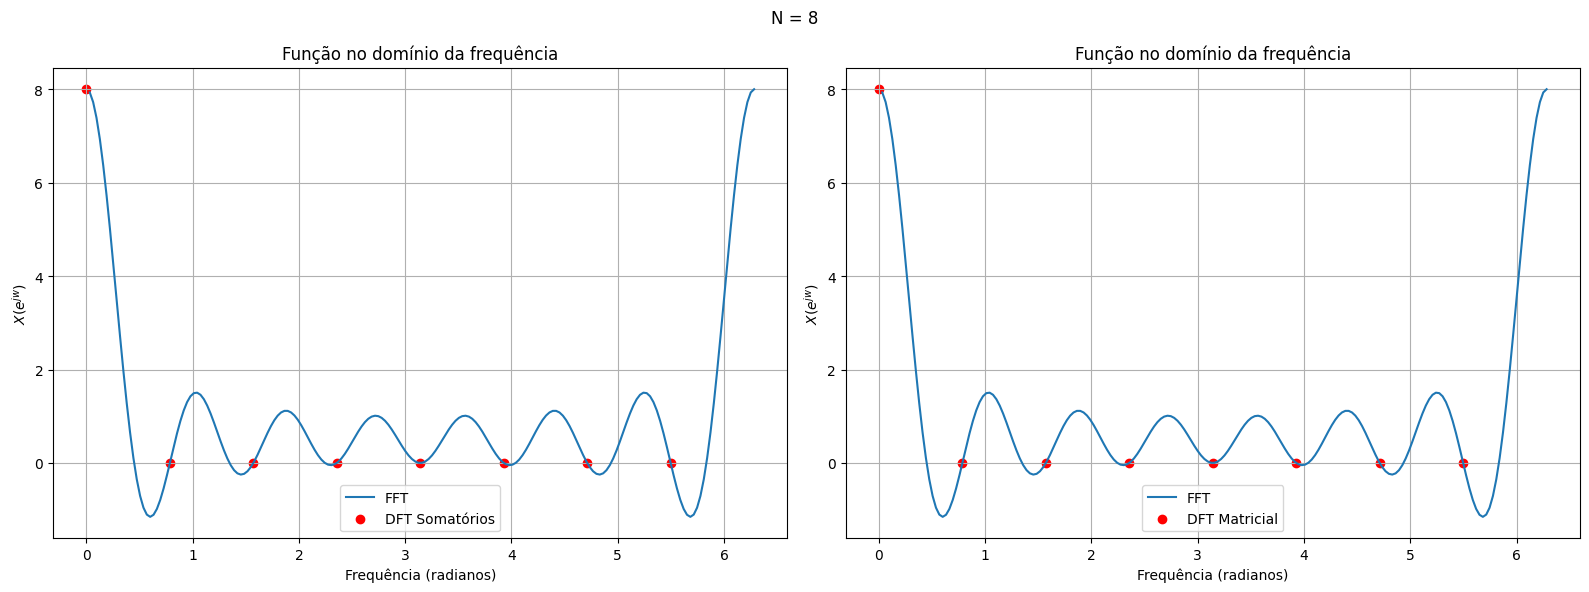

In [6]:
visualize_dfts(N = 8)

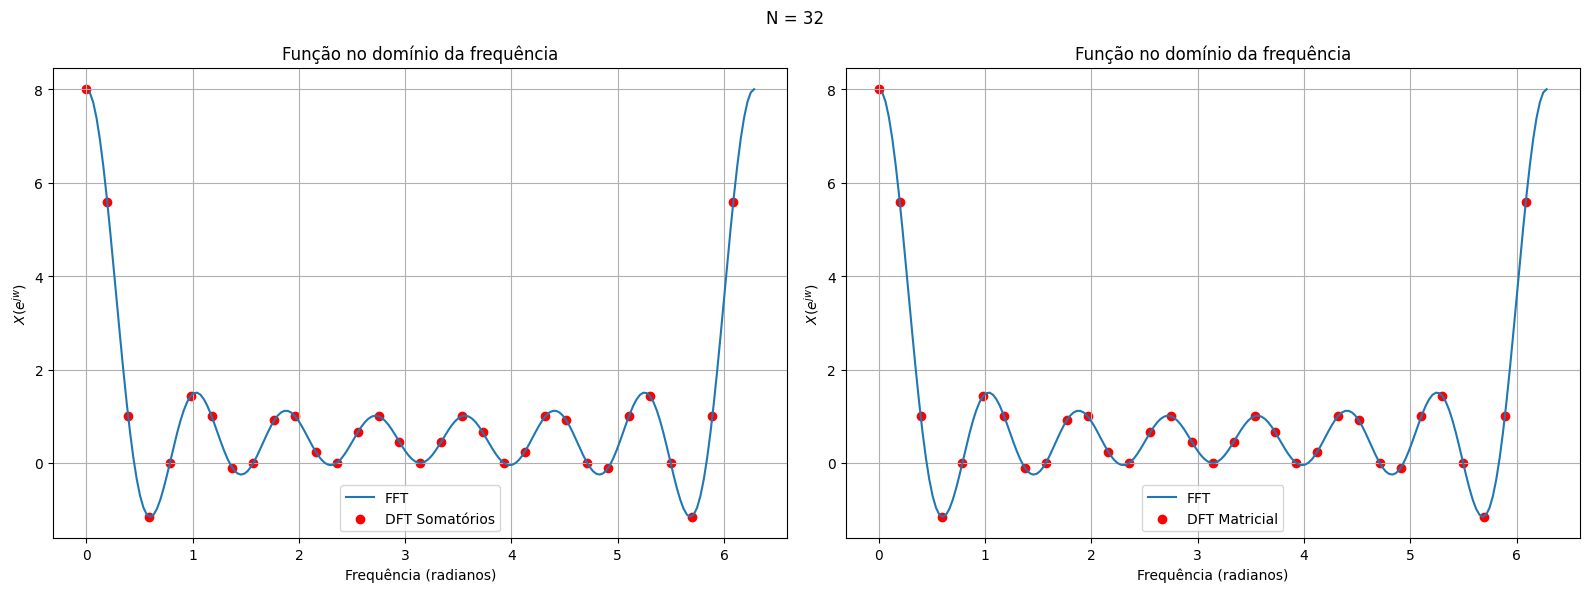

In [7]:
visualize_dfts(N = 32)

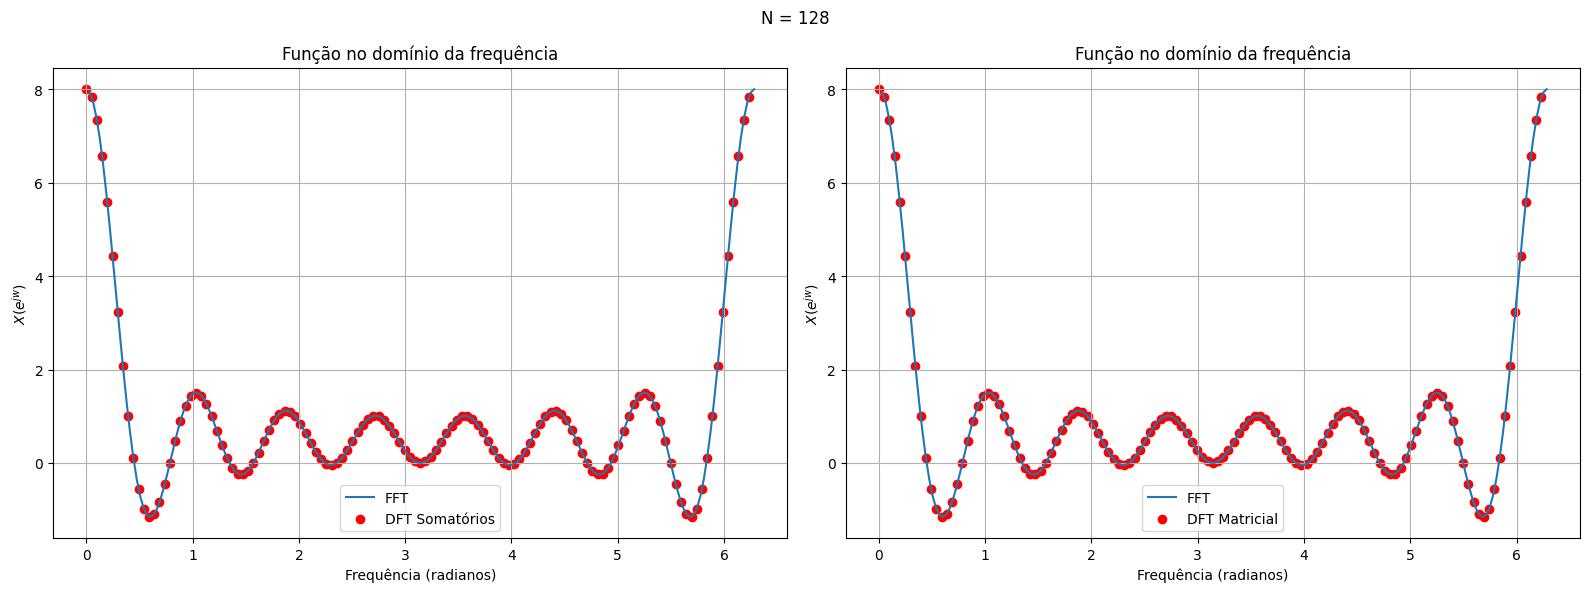

In [8]:
visualize_dfts(N = 128)

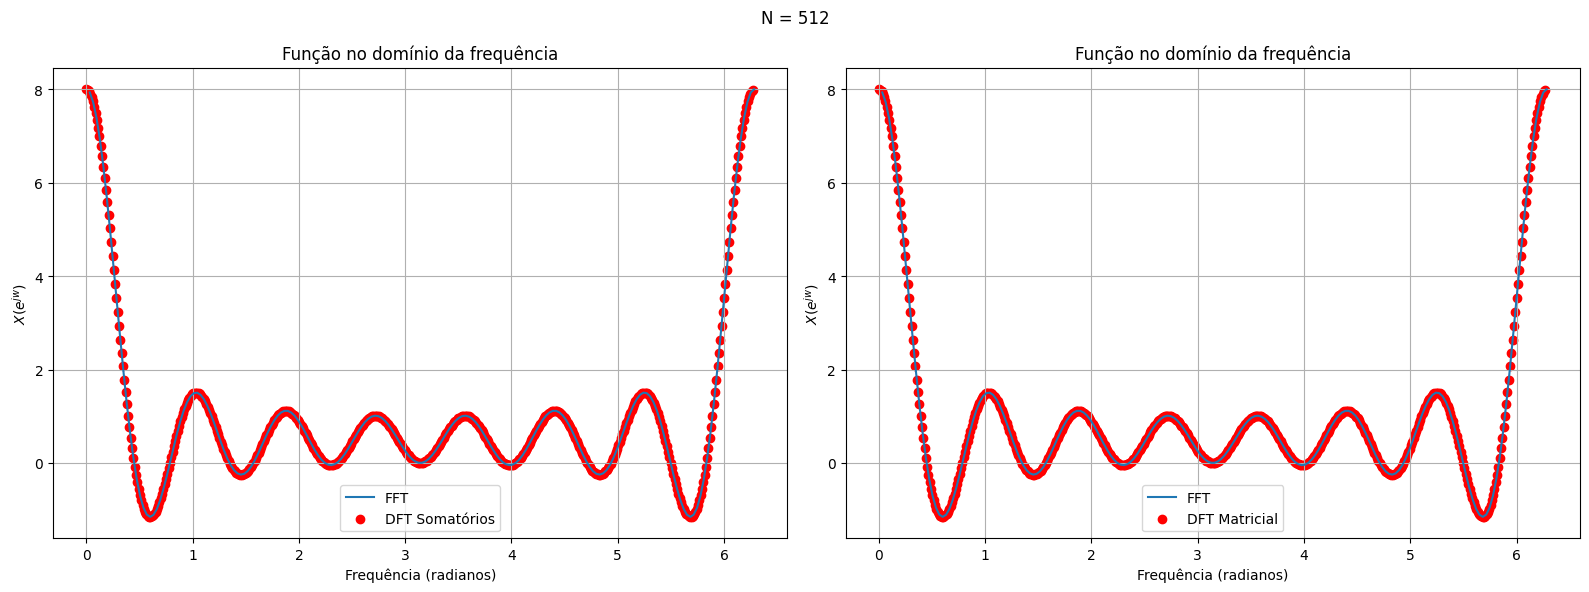

In [9]:
visualize_dfts(N = 512)

### Análise das DFT para um impulso e um impulso deslocado
***

In [10]:
def x_impulse(w):
    '''
    Representação do sinal x[n] no domínio da frequência.

    Inputs:
        w (int) -> frequência em radianos.
    '''

    return  np.exp(-1j * w * 0)

def x_impulse_shift(w, no):
    '''
    Representação do sinal x[n] no domínio da frequência.

    Inputs:
        w (int) -> frequência em radianos.
        no (int) -> deslocamento do impulson.
    '''

    return  np.exp(-1j * w * no)

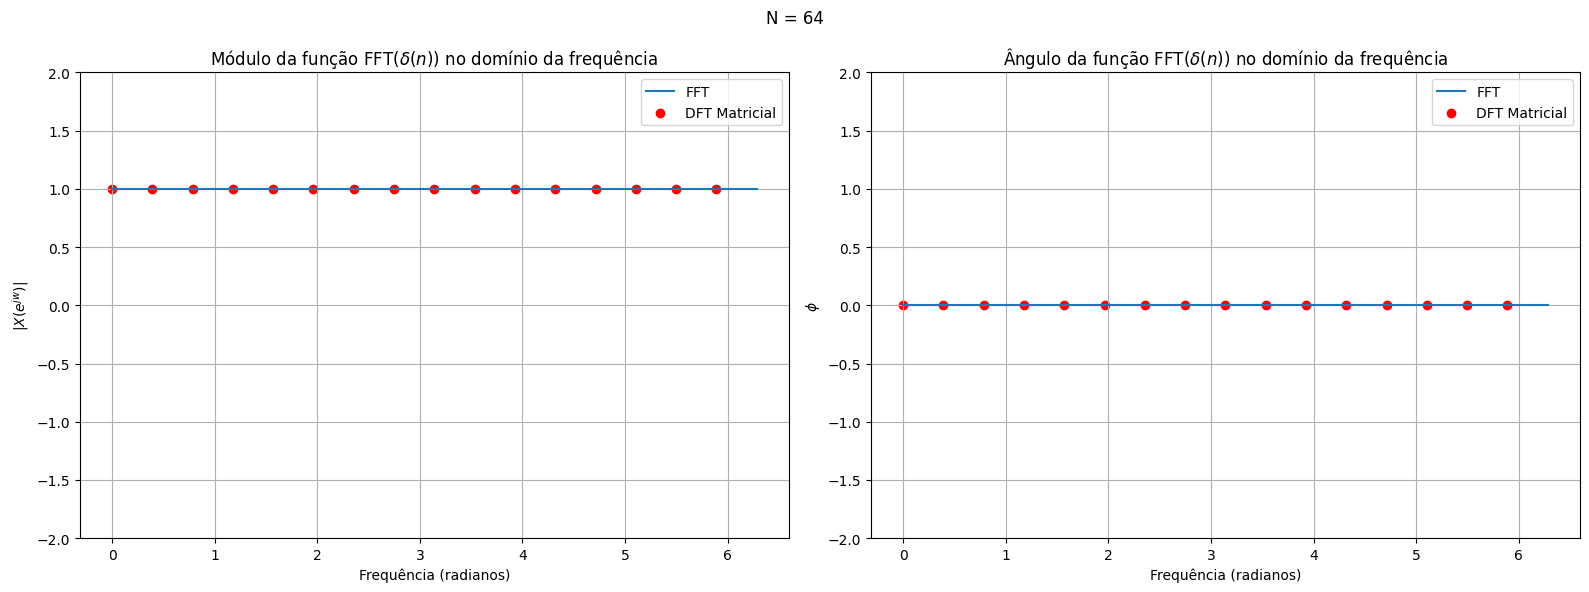

In [11]:
# criando os objetos para plotar duas imagens
fig, axs = plt.subplots(1, 2 , figsize=(16, 6))

discrete_signal3 = dft_sum([1.], N = 16)
discrete_signal4 = dft_matrix([1.], N = 16)

# definindo os valores no domínio da frequência (radianos)
w = np.linspace(0, 2 * np.pi, 200)


# plotando o módulo do sinal x(e^(jw))
axs[0].plot(w, np.abs(x_impulse(w)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[0].scatter(dft_x_axis, np.abs(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[0].set_xlabel('Frequência (radianos)')
axs[0].set_ylabel('$|X(e^{jw})|$')
axs[0].set_title(f'Módulo da função FFT($\delta(n)$) no domínio da frequência')
axs[0].set_ylim([-2, 2])
axs[0].grid(True)
axs[0].legend()

# plotando o ângulo do sinal x(e^(jw))
axs[1].plot(w, np.angle(x_impulse(w)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[1].scatter(dft_x_axis, np.angle(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[1].set_xlabel('Frequência (radianos)')
axs[1].set_ylabel('$\phi$')
axs[1].set_title(f'Ângulo da função FFT($\delta(n)$) no domínio da frequência')
axs[1].set_ylim([-2, 2])
axs[1].grid(True)
axs[1].legend()

# adiciona um título geral para a figura
fig.suptitle(f'N = {64}')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


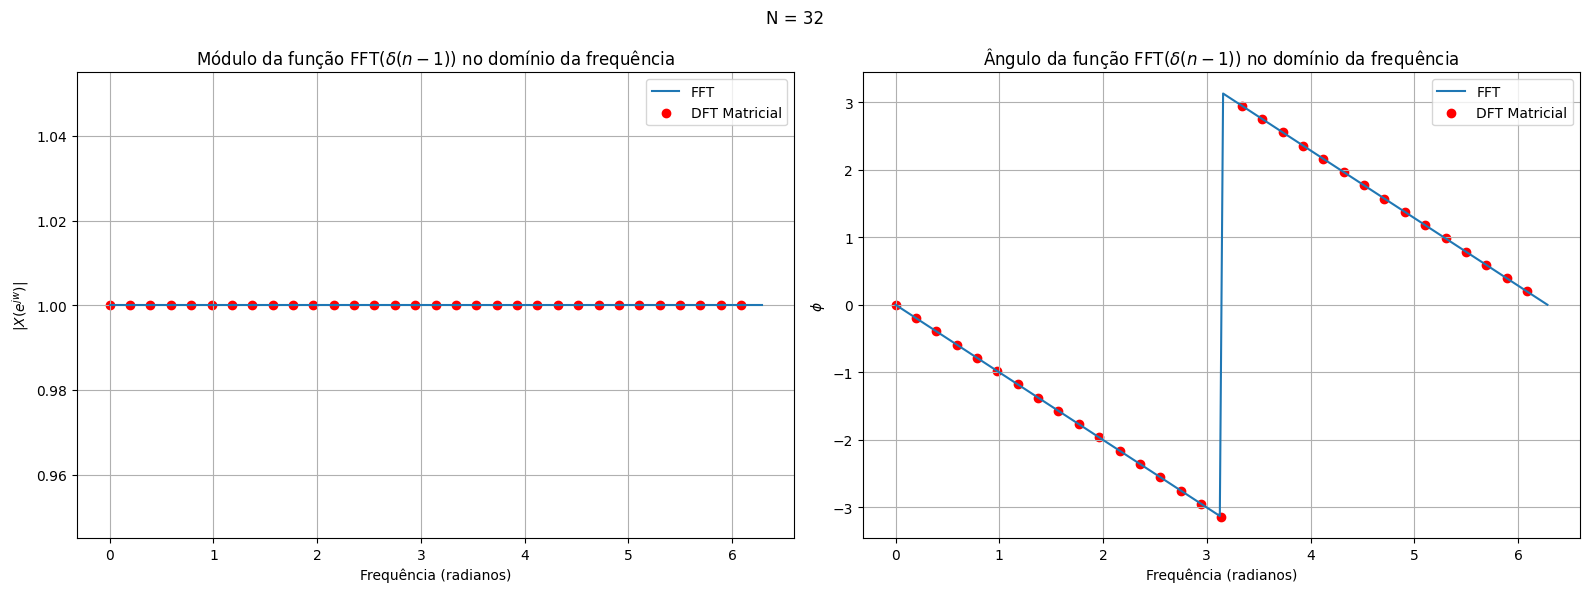

In [12]:
# criando os objetos para plotar duas imagens
fig, axs = plt.subplots(1, 2 , figsize=(16, 6))

discrete_signal3 = dft_sum([0, 1., 0, 0], N = 32)
discrete_signal4 = dft_matrix([0, 1., 0, 0], N = 32)

# definindo os valores no domínio da frequência (radianos)
w = np.linspace(0, 2 * np.pi, 200)


# plotando o módulo do sinal x(e^(jw))
axs[0].plot(w, np.abs(x_impulse_shift(w, no = 1)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[0].scatter(dft_x_axis, np.abs(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[0].set_xlabel('Frequência (radianos)')
axs[0].set_ylabel('$|X(e^{jw})|$')
axs[0].set_title(f'Módulo da função FFT($\delta(n-1)$) no domínio da frequência')
axs[0].grid(True)
axs[0].legend()

# plotando o ângulo do sinal x(e^(jw))
axs[1].plot(w, np.angle(x_impulse_shift(w, no = 1)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[1].scatter(dft_x_axis, np.angle(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[1].set_xlabel('Frequência (radianos)')
axs[1].set_ylabel('$\phi$')
axs[1].set_title(f'Ângulo da função FFT($\delta(n-1)$) no domínio da frequência')
axs[1].grid(True)
axs[1].legend()

# adiciona um título geral para a figura
fig.suptitle(f'N = {32}')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


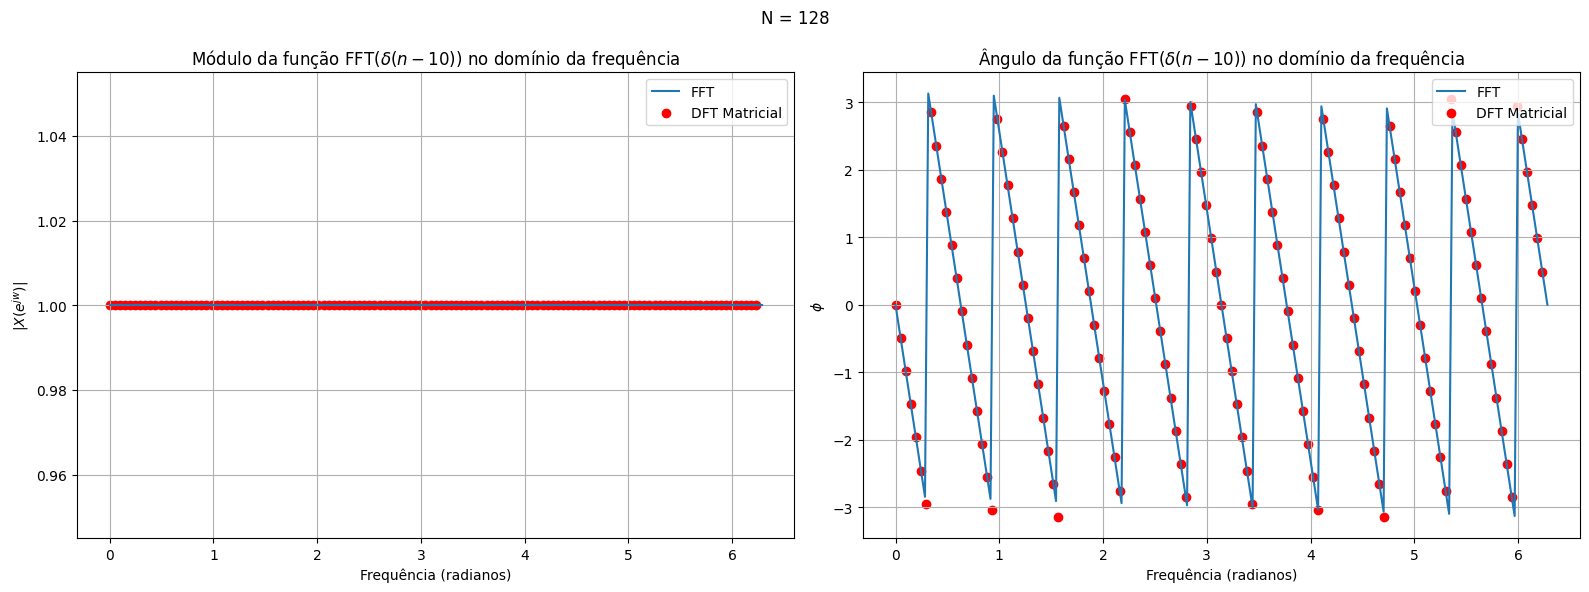

In [13]:
# criando os objetos para plotar duas imagens
fig, axs = plt.subplots(1, 2 , figsize=(16, 6))

discrete_signal3 = dft_sum([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1., 0, 0, 0,], N = 128)
discrete_signal4 = dft_matrix([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1., 0, 0, 0], N = 128)

# definindo os valores no domínio da frequência (radianos)
w = np.linspace(0, 2 * np.pi, 200)


# plotando o módulo do sinal x(e^(jw))
axs[0].plot(w, np.abs(x_impulse_shift(w, no = 10)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[0].scatter(dft_x_axis, np.abs(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[0].set_xlabel('Frequência (radianos)')
axs[0].set_ylabel('$|X(e^{jw})|$')
axs[0].set_title(f'Módulo da função FFT($\delta(n-10)$) no domínio da frequência')
axs[0].grid(True)
axs[0].legend()

# plotando o ângulo do sinal x(e^(jw))
axs[1].plot(w, np.angle(x_impulse_shift(w, no = 10)), label = 'FFT')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
dft_x_axis = np.arange(0, np.max(w), (np.max(w) / len(discrete_signal3)))
# plota os pontos obtidos com a DFT para o método de somatórios
axs[1].scatter(dft_x_axis, np.angle(discrete_signal4), color = 'red', marker = 'o', label = 'DFT Matricial')
# define os valores no eixo x, igualmente espaçados para a resolução do sinal x(e^(jw))
axs[1].set_xlabel('Frequência (radianos)')
axs[1].set_ylabel('$\phi$')
axs[1].set_title(f'Ângulo da função FFT($\delta(n-10)$) no domínio da frequência')
axs[1].grid(True)
axs[1].legend()

# adiciona um título geral para a figura
fig.suptitle(f'N = {128}')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


### Gráfico do Tempo de Cálculo para Diferentes Valores de N
***

In [23]:
signal = [1,1,1,1,1,1,1,1]
time_inference = list()
for increase in range(len(signal), 1000):
    init_time = time.time()
    result = dft_matrix(signal, increase)
    final_time = time.time()
    time_inference.append((final_time - init_time) * 1000)

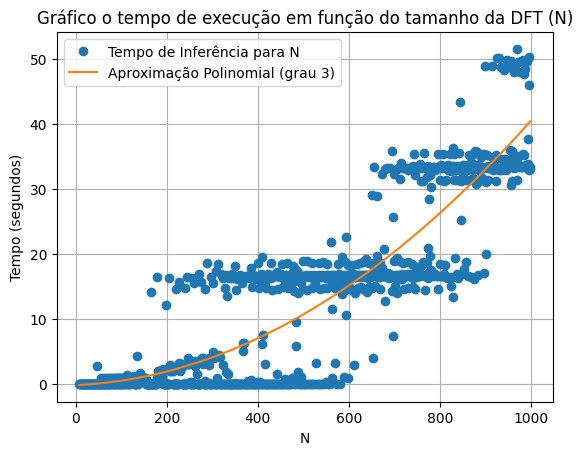

In [40]:
x = np.arange(8, len(time_inference) + 8)
y = time_inference
grau = 3
coeficientes = np.polyfit(x, y, grau)
polinomio = np.poly1d(coeficientes)
y_plot = polinomio(x)

# Plotagem dos dados originais e da aproximação polinomial
plt.plot(x, y, 'o', label='Tempo de Inferência para N')
plt.plot(x, y_plot, label=f'Aproximação Polinomial (grau {grau})')
plt.xlabel('N')
plt.ylabel('Tempo (segundos)')
plt.title('Gráfico o tempo de execução em função do tamanho da DFT (N)')
plt.legend()
plt.grid(True)
plt.show()